In [2]:
import pandas as pd  

# loading the dataset
df = pd.read_csv("/Users/harshsingrole/Documents/classification_dataset.csv")

# just checking the shape and first few rows to understand the data
print(df.shape)
print(df.head())

# separating features and target variable
X = df.drop(columns=["target"])
y = df["target"]


(2188, 50)
     feature_0    feature_1  feature_2  feature_3  feature_4  feature_5  \
0  1340.000000  3519.957381   0.380686         19    1034.88        0.0   
1   848.932000  2048.459524   0.414425          1     -20.00        0.0   
2  3221.932000     0.000000        NaN          3    1940.00        3.0   
3  2588.149444  6061.437778   0.426986          7    2260.00        5.0   
4  2553.985357  4667.861429   0.547142         23    4160.00        0.0   

   feature_6  feature_7  feature_8   feature_9  ...   feature_40  feature_41  \
0    1728.97       0.00          0  357.605934  ...   442.603437   61.913877   
1    2100.00   11024.85         19  578.642418  ...  1848.921111  105.802407   
2      23.50    3500.00         54    0.000000  ...   329.181746   91.030877   
3      76.00       0.00         15  276.366484  ...   700.760000   98.421509   
4     140.00    6000.00          0  508.574066  ...   630.421569   86.574044   

    feature_42  feature_43  feature_44   feature_45  feat

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# handling missing values using median (in case any column has NaNs)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# scaling the features to bring everything on same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


/Users/harshsingrole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshsingrole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshsingrole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


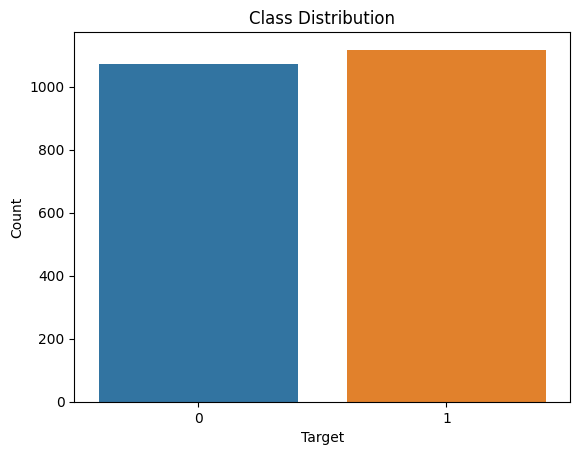

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# just checking how the classes are distributed
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

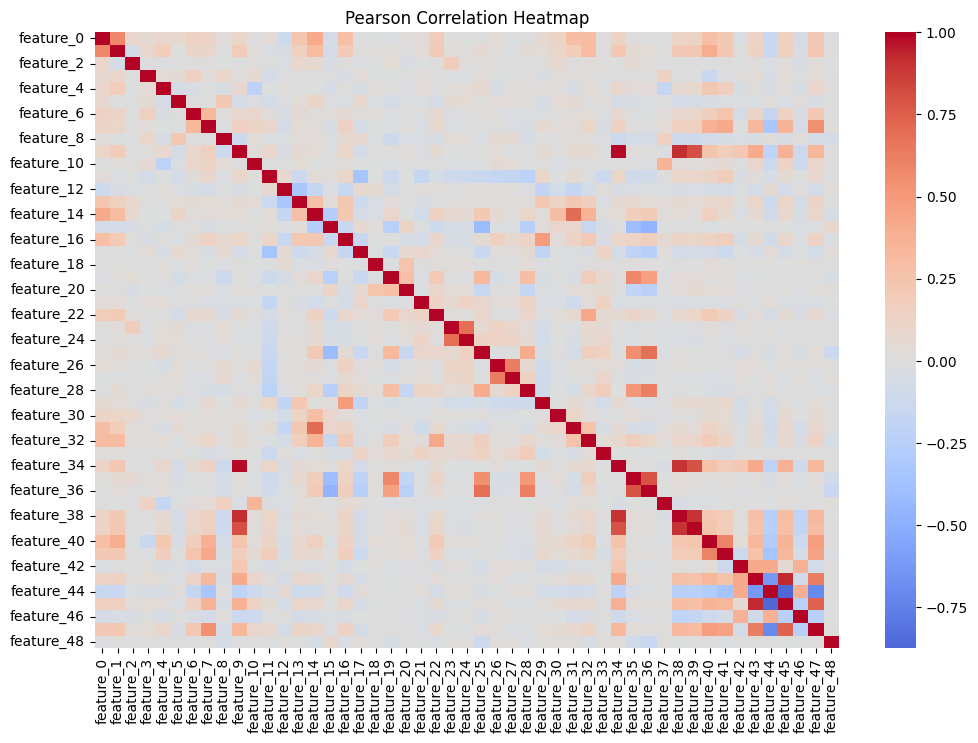

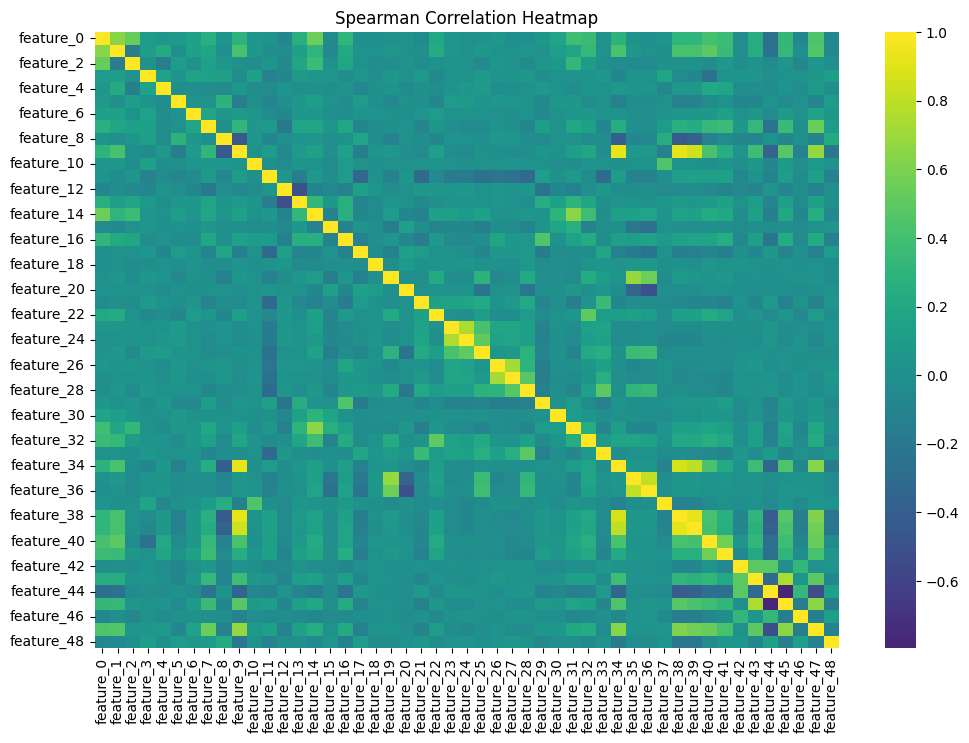

In [8]:
# converting scaled features back to DataFrame so I can check correlations
X_df = pd.DataFrame(X_scaled, columns=X.columns)

# plotting Pearson correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X_df.corr(method='pearson'), cmap='coolwarm', center=0)
plt.title("Pearson Correlation Heatmap")
plt.show()

# plotting Spearman correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X_df.corr(method='spearman'), cmap='viridis', center=0)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [18]:
# Step 1: importing all the libraries I’ll need
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Step 2: preparing the data
X = df.drop('target', axis=1)   # dropping target column to get features
y = df['target']                # saving target separately

# handling missing values (just in case) using median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# scaling the features — important for models like SVM, logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 3: splitting the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: defining all the models I want to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Step 5: training each model and checking accuracy
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)                  # training the model
    y_pred = model.predict(X_test)               # predicting on test set
    acc = accuracy_score(y_test, y_pred)         # calculating accuracy
    results[name] = acc                          # saving the result

# printing all the model accuracies, sorted from highest to lowest
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
print("Model Accuracies:")
for model, score in sorted_results.items():
    print(f"{model}: {score:.4f}")

Model Accuracies:
Random Forest: 0.7306
Logistic Regression: 0.7260
Support Vector Machine: 0.6941
Naive Bayes: 0.6210
Decision Tree: 0.6164
K-Nearest Neighbors: 0.6005


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# setting up the base model
rf = RandomForestClassifier(random_state=42)

# defining parameter ranges
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# trying different cv values to see which gives best score
best_cv = None
best_score = 0
best_search = None

for cv_val in [5, 7, 10]:
    print(f"\nTrying with cv = {cv_val}...")
    search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                n_iter=10, cv=cv_val, scoring='accuracy',
                                n_jobs=1, random_state=42, verbose=0)
    search.fit(X_train, y_train)
    
    if search.best_score_ > best_score:
        best_score = search.best_score_
        best_cv = cv_val
        best_search = search

# showing the best results
print(f"\nBest CV value: {best_cv}")
print("Best Parameters:", best_search.best_params_)
print("Best CV Accuracy:", best_search.best_score_)

test set accuracy
best_model = best_search.best_estimator_
test_acc = best_model.score(X_test, y_test)
print("Test Accuracy on unseen data:", test_acc)



Trying with cv = 5...

Trying with cv = 7...

Trying with cv = 10...

Best CV value: 5
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 260}
Best CV Accuracy: 0.7497142857142858
Test Accuracy on unseen data: 0.7465753424657534


Test Accuracy: 0.7511415525114156

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       222
           1       0.74      0.77      0.75       216

    accuracy                           0.75       438
   macro avg       0.75      0.75      0.75       438
weighted avg       0.75      0.75      0.75       438



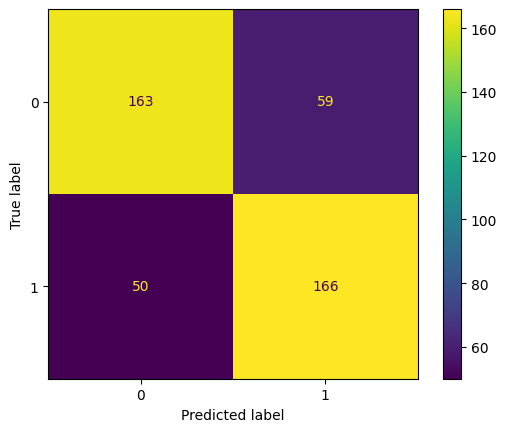

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# using the best model from random search to make predictions
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# checking test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# printing detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [24]:
# getting permutation importance on the training set
from sklearn.inspection import permutation_importance

perm_result = permutation_importance(best_rf, X_train, y_train, n_repeats=10,
                                     random_state=42, n_jobs=-1)


/Users/harshsingrole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshsingrole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshsingrole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


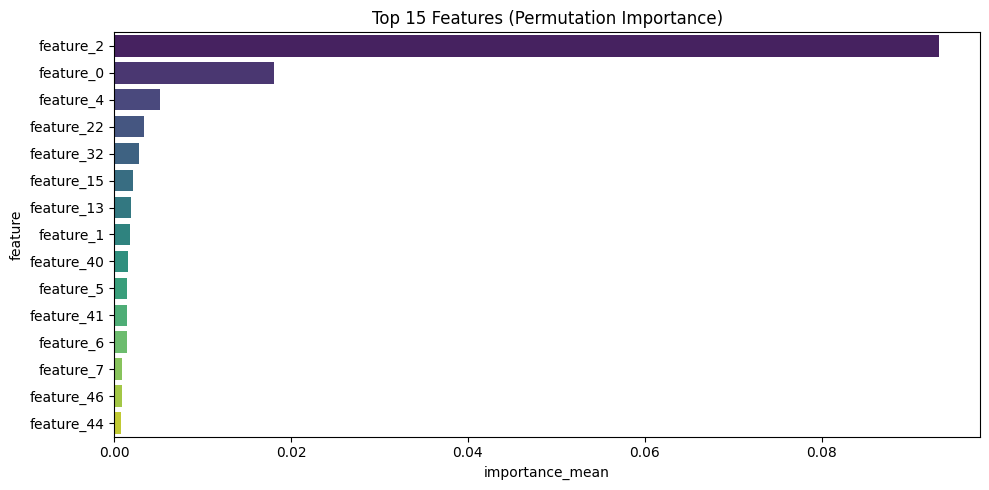

Selected features: ['feature_2', 'feature_0', 'feature_4', 'feature_22', 'feature_32', 'feature_15', 'feature_13', 'feature_1', 'feature_40', 'feature_5', 'feature_41', 'feature_6']


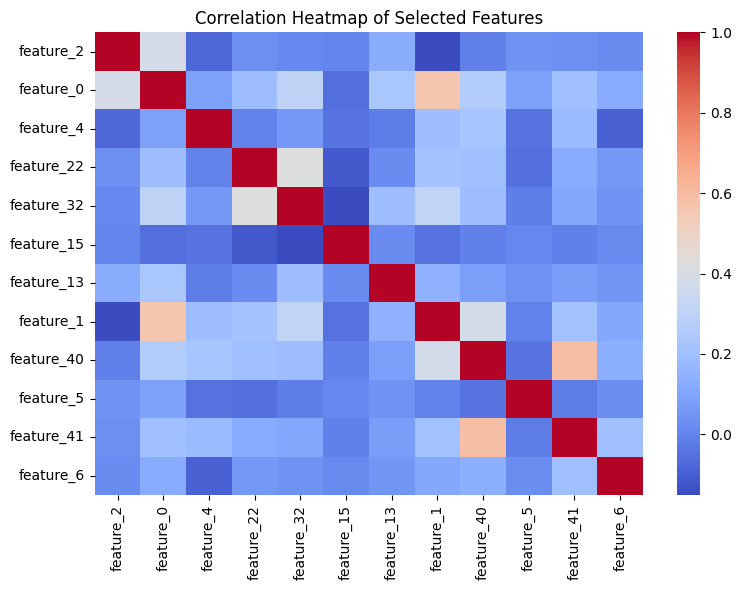

Accuracy before feature selection: 0.7374429223744292
Accuracy after feature selection: 0.7557077625570776


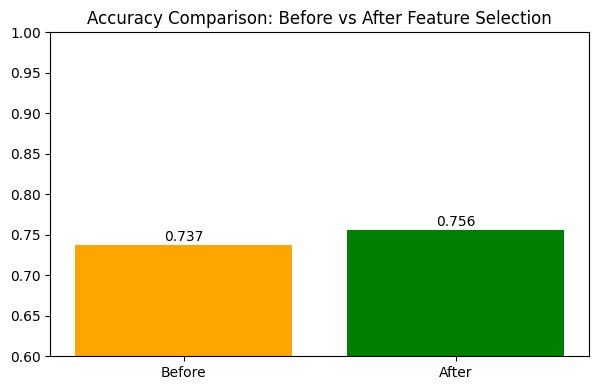

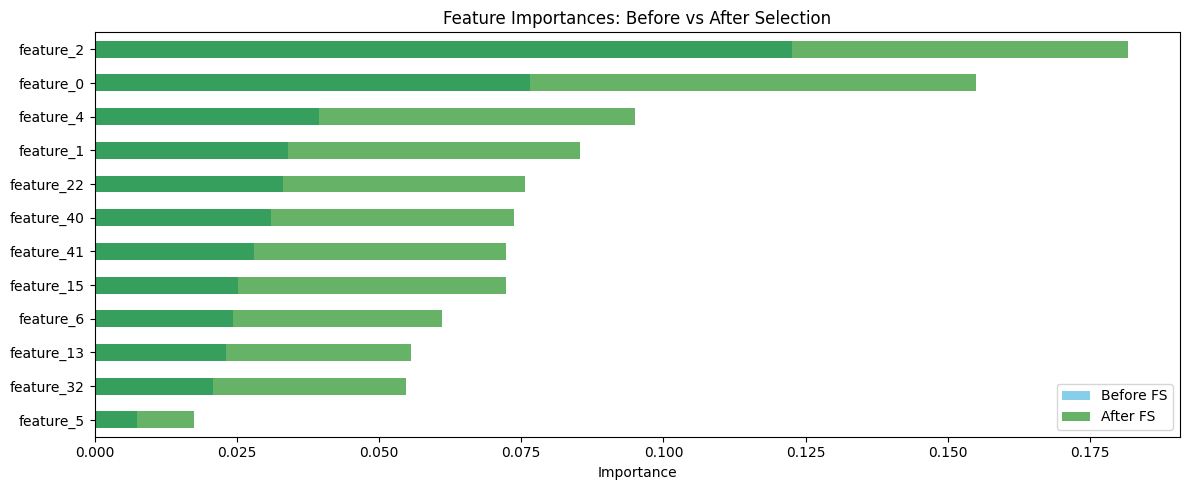

In [26]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# training a random forest model on the full training set
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# calculating permutation importance to know which features are contributing the most
perm_result = permutation_importance(rf_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)

# making a DataFrame with feature names and their importance scores
feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': perm_result.importances_mean,
    'importance_std': perm_result.importances_std
}).sort_values(by='importance_mean', ascending=False)

# plotting top 15 important features
top15 = importance_df.head(15)
plt.figure(figsize=(10, 5))
sns.barplot(x='importance_mean', y='feature', data=top15, palette='viridis')
plt.title("Top 15 Features (Permutation Importance)")
plt.tight_layout()
plt.show()

# selecting features with decent importance
selected_features = importance_df[importance_df['importance_mean'] > 0.001]['feature'].tolist()
print("Selected features:", selected_features)

# creating new train/test data with only selected features
selected_indices = [int(f.split('_')[1]) for f in selected_features]
X_train_selected = X_train[:, selected_indices]
X_test_selected = X_test[:, selected_indices]

# plotting correlation heatmap of selected features
X_train_df = pd.DataFrame(X_train_selected, columns=selected_features)
plt.figure(figsize=(8, 6))
sns.heatmap(X_train_df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Selected Features")
plt.tight_layout()
plt.show()

# training new model using only selected features
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

# making predictions before and after feature selection
y_pred_before = rf_model.predict(X_test)
y_pred_after = rf_selected.predict(X_test_selected)

# calculating accuracy before and after
acc_before = accuracy_score(y_test, y_pred_before)
acc_after = accuracy_score(y_test, y_pred_after)

print("Accuracy before feature selection:", acc_before)
print("Accuracy after feature selection:", acc_after)

# plotting accuracy comparison
plt.figure(figsize=(6, 4))
bars = plt.bar(["Before", "After"], [acc_before, acc_after], color=["orange", "green"])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height() + 0.005, f"{bar.get_height():.3f}", ha='center')
plt.title("Accuracy Comparison: Before vs After Feature Selection")
plt.tight_layout()
plt.ylim(0.6, 1.0)
plt.show()

# comparing feature importances before and after feature selection
before_importance = pd.Series(rf_model.feature_importances_, index=feature_names)
after_importance = pd.Series(rf_selected.feature_importances_, index=selected_features)

plt.figure(figsize=(12, 5))
before_importance[selected_features].sort_values().plot(kind='barh', color='skyblue', label="Before FS")
after_importance.sort_values().plot(kind='barh', color='green', alpha=0.6, label="After FS")
plt.title("Feature Importances: Before vs After Selection")
plt.xlabel("Importance")
plt.legend()
plt.tight_layout()
plt.show()


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# using best parameters found from random search
final_rf = RandomForestClassifier(
    n_estimators=random_search.best_params_['n_estimators'],
    max_depth=random_search.best_params_['max_depth'],
    min_samples_split=random_search.best_params_['min_samples_split'],
    random_state=42
)

# training the model on selected features
final_rf.fit(X_train_selected, y_train)

# doing cross-validation on training data
cv_scores = cross_val_score(final_rf, X_train_selected, y_train, cv=5)
cv_mean = cv_scores.mean()

print("Cross-validation Accuracy (mean):", cv_mean)

Cross-validation Accuracy (mean): 0.7268571428571429


Final Test Accuracy: 0.730593607305936
Precision: 0.7024793388429752
Recall: 0.7870370370370371
F1 Score: 0.74235807860262
ROC-AUC: 0.800759092425759


/Users/harshsingrole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshsingrole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/harshsingrole/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


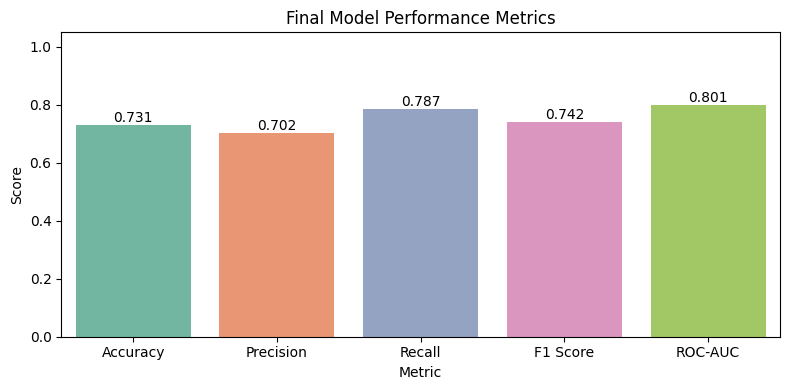

In [43]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# predicting on test data using the final model
final_preds = final_rf.predict(X_test_selected)
final_probs = final_rf.predict_proba(X_test_selected)[:, 1]  # for ROC-AUC

# calculating evaluation metrics
final_acc = accuracy_score(y_test, final_preds)
final_prec = precision_score(y_test, final_preds)
final_rec = recall_score(y_test, final_preds)
final_f1 = f1_score(y_test, final_preds)
final_auc = roc_auc_score(y_test, final_probs)

# printing all the scores
print("Final Test Accuracy:", final_acc)
print("Precision:", final_prec)
print("Recall:", final_rec)
print("F1 Score:", final_f1)
print("ROC-AUC:", final_auc)

# creating a final metric table and plotting
final_metrics = {
    "Accuracy": final_acc,
    "Precision": final_prec,
    "Recall": final_rec,
    "F1 Score": final_f1,
    "ROC-AUC": final_auc
}

# convert to DataFrame
final_metrics_df = pd.DataFrame(list(final_metrics.items()), columns=["Metric", "Score"])

# plot the metrics as a bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x="Metric", y="Score", data=final_metrics_df, palette="Set2")
plt.title("Final Model Performance Metrics")
plt.ylim(0, 1.05)
for i, row in final_metrics_df.iterrows():
    plt.text(i, row["Score"] + 0.01, f"{row['Score']:.3f}", ha='center')
plt.tight_layout()
plt.show()


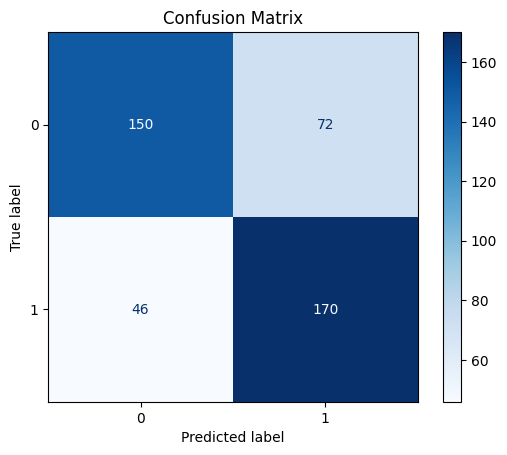

In [45]:
cm = confusion_matrix(y_test, final_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


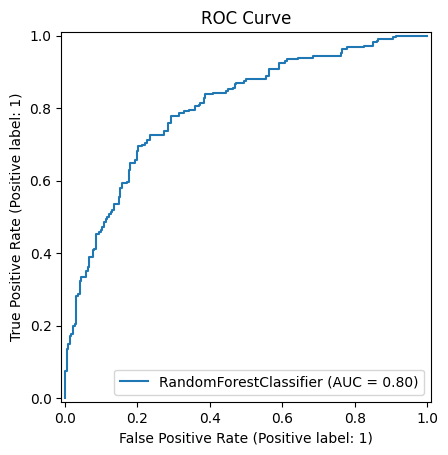

In [47]:
RocCurveDisplay.from_estimator(final_rf, X_test_selected, y_test)
plt.title("ROC Curve")
plt.show()